1.2.9 Método para análise estratégica: Análise estratégica de dados para alinhamento das outorgas portuárias

In [6]:
import scipy

In [10]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [10]:
#points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],[2, 0], [2, 1], [2, 2]])
#points = np.array([[0, 1], [1, 0], [1, 2], [2, 1]])
points = np.array([[0, 0], [0, 0.5], [0, 2], [1, 0], [1, 1], [1, 2.5],[2, 0], [2, 1], [2, 2]])

In [11]:
vor = Voronoi(points)

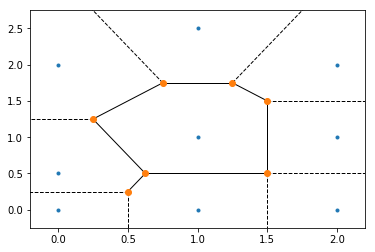

In [12]:
voronoi_plot_2d(vor)
plt.show()

In [14]:
vor.regions

[[-1, 0, 1],
 [],
 [4, 2, -1, 3],
 [2, 0, -1],
 [3, -1],
 [5, 6, -1],
 [5, 6, 4, 2, 0, 1],
 [-1, 6],
 [5, 1, -1],
 [4, 6, -1, 3]]

In [5]:
# warehouse_location.py: Warehouse location determination problem
from pyomo.environ import *

model = ConcreteModel(name="(WL)")

W = ['Harlingen', 'Memphis', 'Ashland']
C = ['NYC', 'LA', 'Chicago', 'Houston']
d = {('Harlingen', 'NYC'): 1956, \
     ('Harlingen', 'LA'): 1606, \
     ('Harlingen', 'Chicago'): 1410, \
     ('Harlingen', 'Houston'): 330, \
     ('Memphis', 'NYC'): 1096, \
     ('Memphis', 'LA'): 1792, \
     ('Memphis', 'Chicago'): 531, \
     ('Memphis', 'Houston'): 567, \
     ('Ashland', 'NYC'): 485, \
     ('Ashland', 'LA'): 2322, \
     ('Ashland', 'Chicago'): 324, \
     ('Ashland', 'Houston'): 1236 }
P = 2

model.x = Var(W, C, bounds=(0,1))
model.y = Var(W, within=Binary)

def obj_rule(m):
    return sum(d[w,c]*m.x[w,c] for w in W for c in C)
model.obj = Objective(rule=obj_rule)

def one_per_cust_rule(m, c):
    return sum(m.x[w,c] for w in W) == 1
model.one_per_cust = Constraint(C, rule=one_per_cust_rule)

def warehouse_active_rule(m, w, c):
    return m.x[w,c] <= m.y[w]
model.warehouse_active = Constraint(W, C, rule=warehouse_active_rule)

def num_warehouses_rule(m):
    return sum(m.y[w] for w in W) <= P
model.num_warehouses = Constraint(rule=num_warehouses_rule)

SolverFactory('cbc').solve(model)

# model.y.pprint()
# model.x.pprint()
model.pprint()

#print(obj_rule(model))
#model.display()



8 Set Declarations
    one_per_cust_index : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        ['Chicago', 'Houston', 'LA', 'NYC']
    warehouse_active_index : Dim=0, Dimen=2, Size=12, Domain=None, Ordered=False, Bounds=None
        Virtual
    warehouse_active_index_0 : Dim=0, Dimen=1, Size=3, Domain=None, Ordered=False, Bounds=None
        ['Ashland', 'Harlingen', 'Memphis']
    warehouse_active_index_1 : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        ['Chicago', 'Houston', 'LA', 'NYC']
    x_index : Dim=0, Dimen=2, Size=12, Domain=None, Ordered=False, Bounds=None
        Virtual
    x_index_0 : Dim=0, Dimen=1, Size=3, Domain=None, Ordered=False, Bounds=None
        ['Ashland', 'Harlingen', 'Memphis']
    x_index_1 : Dim=0, Dimen=1, Size=4, Domain=None, Ordered=False, Bounds=None
        ['Chicago', 'Houston', 'LA', 'NYC']
    y_index : Dim=0, Dimen=1, Size=3, Domain=None, Ordered=False, Bounds=None
        ['Ashland', 'Harlingen', 'Memph

In [10]:
!pyomo solve --solver=cbc warehouse_location.py

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.00] Creating model
[    0.00] Applying solver
[    0.03] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: optimal
      Function Value: 2745.0
    Solver results file: results.json
[    0.03] Applying Pyomo postprocessing actions
[    0.03] Pyomo Finished


In [20]:
import json
#json.loads(results)
with open("results.json", "r") as results:
    results = json.load(results)

In [34]:
results["Solution"]

[{'number of solutions': 1, 'number of solutions displayed': 1},
 {'Constraint': 'No values',
  'Gap': 0.0,
  'Message': None,
  'Objective': {'obj': {'Value': 2745.0}},
  'Problem': {},
  'Status': 'optimal',
  'Variable': {'x[Ashland,Chicago]': {'Value': 1.0},
   'x[Ashland,NYC]': {'Value': 1.0},
   'x[Harlingen,Houston]': {'Value': 1.0},
   'x[Harlingen,LA]': {'Value': 1.0},
   'y[Ashland]': {'Value': 1.0},
   'y[Harlingen]': {'Value': 1.0}}}]

In [16]:
Capacitated vehicle routing problem
https://www.youtube.com/watch?v=-hGL39jdtQE

SyntaxError: invalid syntax (<ipython-input-16-8f8b9128e97b>, line 1)

In [14]:
import numpy as np

In [15]:
#Monte Carlo Simulation Example
for test in range(1,4):
    print("Test", test)
    for k in [1,10,100,1000]:    
        error = []
        for n in range(k,k*10):
            qt_in = 0
            qt_out = 0                
            for i in range(n):
                x = np.random.rand()
                y = np.random.rand()
                if (x**2 + y**2) < 1:
                    qt_in = qt_in + 1
                else:
                    qt_out = qt_out + 1
            cal_pi = 4.0*qt_in/n                
            error.append(abs(cal_pi - np.pi))                
        print(np.mean(error))        

('Test', 1)
0.5223627210297056
0.18191657577201353
0.06247948625530501
0.019966678456679855
('Test', 2)
0.6485367498697655
0.18653504214043934
0.06430479157277978
0.01971521833312833
('Test', 3)
0.6478641771984641
0.22924444570439845
0.06308250192660808
0.01980449887615814
